In [ ]:
#load csv file into data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

performance_filepath = ('academic_performance.csv')
performance_data = pd.read_csv(performance_filepath)
performance_data.head(10)

,Student_ID,Name,Gender,Age,Class,Math,English,Science,Total,GPA
0,1,Alice,F,17.0,12,90.0,85,92,267,3.89
1,2,Bob,M,16.0,11,78.0,92,88,258,3.65
2,3,Carol,F,18.0,12,95.0,88,91,274,4.00
3,4,David,M,17.0,11,82.0,76,85,243,3.45
4,5,Emma,F,16.0,10,NaN,90,78,256,3.78
5,6,Frank,M,18.0,12,94.0,87,93,274,3.95
6,7,Grace,F,17.0,11,76.0,82,80,238,3.20
7,8,Henry,M,16.0,10,NaN,94,85,268,3.85
8,9,Ivy,F,18.0,12,91.0,89,94,274,3.92
9,10,Jack,M,NaN,11,85.0,80,87,252,3.55


In [ ]:
#check for null values
missing_values = performance_data.isnull()
missing_value_count = missing_values.sum()
print(missing_value_count)

Student_ID    0
Name          0
Gender        0
Age           1
Class         0
Math          2
English       0
Science       0
Total         0
GPA           0
dtype: int64


In [ ]:
#handle missing values in math
performance_data['Math'].fillna(performance_data['Math'].mean(), inplace = True)
performance_data.head(10)

,Student_ID,Name,Gender,Age,Class,Math,English,Science,Total,GPA
0,1,Alice,F,17.0,12,90.000,85,92,267,3.89
1,2,Bob,M,16.0,11,78.000,92,88,258,3.65
2,3,Carol,F,18.0,12,95.000,88,91,274,4.00
3,4,David,M,17.0,11,82.000,76,85,243,3.45
4,5,Emma,F,16.0,10,86.375,90,78,256,3.78
5,6,Frank,M,18.0,12,94.000,87,93,274,3.95
6,7,Grace,F,17.0,11,76.000,82,80,238,3.20
7,8,Henry,M,16.0,10,86.375,94,85,268,3.85
8,9,Ivy,F,18.0,12,91.000,89,94,274,3.92
9,10,Jack,M,NaN,11,85.000,80,87,252,3.55


In [ ]:
#handle missing values in age
performance_data['Age'].fillna(performance_data['Age'].median(), inplace = True)
performance_data.head(10)

,Student_ID,Name,Gender,Age,Class,Math,English,Science,Total,GPA
0,1,Alice,F,17.0,12,90.000,85,92,267,3.89
1,2,Bob,M,16.0,11,78.000,92,88,258,3.65
2,3,Carol,F,18.0,12,95.000,88,91,274,4.00
3,4,David,M,17.0,11,82.000,76,85,243,3.45
4,5,Emma,F,16.0,10,86.375,90,78,256,3.78
5,6,Frank,M,18.0,12,94.000,87,93,274,3.95
6,7,Grace,F,17.0,11,76.000,82,80,238,3.20
7,8,Henry,M,16.0,10,86.375,94,85,268,3.85
8,9,Ivy,F,18.0,12,91.000,89,94,274,3.92
9,10,Jack,M,17.0,11,85.000,80,87,252,3.55


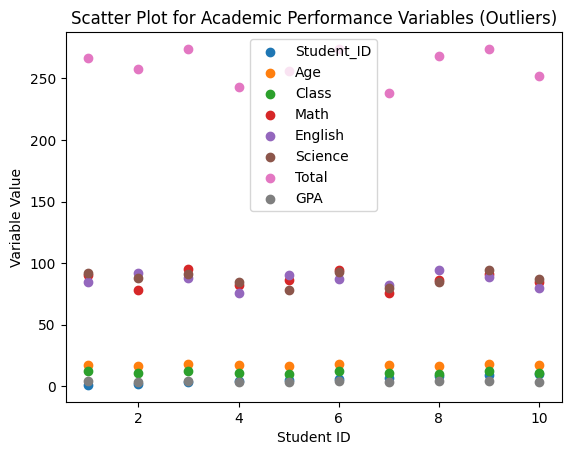

In [ ]:
#check for outliers
numeric_columns = performance_data.select_dtypes(include = [np.number]).columns
for column in numeric_columns:
  plt.scatter(performance_data['Student_ID'], performance_data[column], label = column)

plt.title('Scatter Plot for Academic Performance Variables (Outliers)')
plt.xlabel('Student ID')
plt.ylabel('Variable Value')
plt.legend()
plt.show()

In [ ]:
#handling outliners
numeric_columns = performance_data.select_dtypes(include = [np.number]).columns
for column in numeric_columns:
  std_dev = performance_data[column].std()
  mean_val = performance_data[column].mean()
  upper_limit = mean_val + 3 * std_dev
  lower_limit = mean_val - 3 * std_dev
  performance_data[column] = np.where(performance_data[column] > upper_limit, upper_limit, performance_data[column])
  performance_data[column] = np.where(performance_data[column] < lower_limit, lower_limit, performance_data[column])
performance_data.head(10)

,Student_ID,Name,Gender,Age,Class,Math,English,Science,Total,GPA
0,1.0,Alice,F,17.0,12.0,90.000,85.0,92.0,267.0,3.89
1,2.0,Bob,M,16.0,11.0,78.000,92.0,88.0,258.0,3.65
2,3.0,Carol,F,18.0,12.0,95.000,88.0,91.0,274.0,4.00
3,4.0,David,M,17.0,11.0,82.000,76.0,85.0,243.0,3.45
4,5.0,Emma,F,16.0,10.0,86.375,90.0,78.0,256.0,3.78
5,6.0,Frank,M,18.0,12.0,94.000,87.0,93.0,274.0,3.95
6,7.0,Grace,F,17.0,11.0,76.000,82.0,80.0,238.0,3.20
7,8.0,Henry,M,16.0,10.0,86.375,94.0,85.0,268.0,3.85
8,9.0,Ivy,F,18.0,12.0,91.000,89.0,94.0,274.0,3.92
9,10.0,Jack,M,17.0,11.0,85.000,80.0,87.0,252.0,3.55
